In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


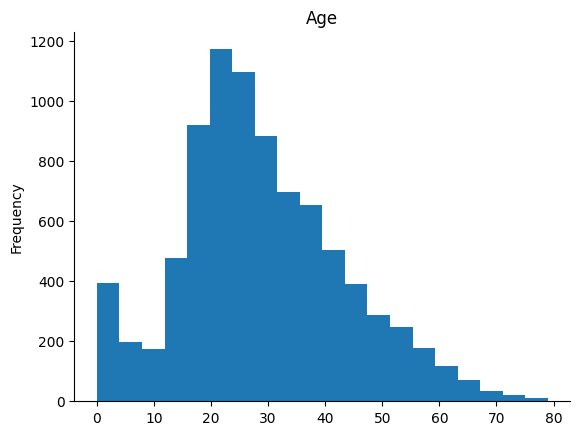

In [ ]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins. (Указывает, решил ли пассажир быть помещен в анабиоз на время рейса. Пассажиры, находящиеся в криосне, прикованы к своим каютам)

- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard. (Номер каюты, в которой находится пассажир. Принимает форму deck/num/side, где side может быть либо P для левого , либо S для правого борта)

- Destination - The planet the passenger will be debarking to.

- Age - The age of the passenger.

- VIP - Whether the passenger has paid for special VIP service during the voyage.

- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities. (Сумма, которую пассажир выставил счет за каждое из многочисленных роскошных удобств космического корабля «Титаник »)

- Name - The first and last names of the passenger.

- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [3]:
df_test = pd.read_csv("test.csv")
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
(df.isna().sum() * 100 / df.shape[0]).sort_values()[-1:0:-1].head(20)

CryoSleep       2.496261
ShoppingMall    2.392730
VIP             2.335212
HomePlanet      2.312205
Name            2.300702
Cabin           2.289198
VRDeck          2.162660
Spa             2.105142
FoodCourt       2.105142
Destination     2.093639
RoomService     2.082135
Age             2.059128
Transported     0.000000
dtype: float64

In [5]:
(df_test.isna().sum() * 100 / df_test.shape[0]).sort_values()[-1:0:-1].head(20)

FoodCourt       2.478373
Spa             2.361468
Cabin           2.338087
ShoppingMall    2.291326
Name            2.197802
VIP             2.174421
CryoSleep       2.174421
Destination     2.151040
Age             2.127660
HomePlanet      2.034136
RoomService     1.917232
VRDeck          1.870470
dtype: float64

In [6]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].fillna(0)
df_test[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = df_test[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].fillna(0)
df[["VIP", "CryoSleep"]] = df[["VIP", "CryoSleep"]].fillna(False)
df_test[["VIP", "CryoSleep"]] = df_test[["VIP", "CryoSleep"]].fillna(False)
df["Destination"] = df["Destination"].fillna(df["Destination"].mode().iloc[0])
df_test["Destination"] = df_test["Destination"].fillna(df["Destination"].mode().iloc[0])
df["Age"] = df["Age"].fillna(df["Age"].mean())
df_test["Age"] = df_test["Age"].fillna(df["Age"].mean())

In [8]:
missing_values = df['HomePlanet'].isnull()
present_values = df['HomePlanet'][~missing_values]
# Рассчитываем процентное распределение категорий
distribution = present_values.value_counts(normalize=True)
df.loc[missing_values, 'HomePlanet'] = np.random.choice(distribution.index, size=sum(missing_values), p=distribution.values)
missing_values = df_test['HomePlanet'].isnull()
present_values = df_test['HomePlanet'][~missing_values]
df_test.loc[missing_values, 'HomePlanet'] = np.random.choice(distribution.index, size=sum(missing_values), p=distribution.values)

In [9]:
(df.isna().sum() * 100 / df.shape[0]).sort_values()[-1:0:-1].head(20)

Name            2.300702
Cabin           2.289198
Transported     0.000000
VRDeck          0.000000
Spa             0.000000
ShoppingMall    0.000000
FoodCourt       0.000000
RoomService     0.000000
VIP             0.000000
Age             0.000000
Destination     0.000000
CryoSleep       0.000000
HomePlanet      0.000000
dtype: float64

In [10]:
(df_test.isna().sum() * 100 / df_test.shape[0]).sort_values()[-1:0:-1].head(20)

Cabin           2.338087
Name            2.197802
VRDeck          0.000000
Spa             0.000000
ShoppingMall    0.000000
FoodCourt       0.000000
RoomService     0.000000
VIP             0.000000
Age             0.000000
Destination     0.000000
CryoSleep       0.000000
HomePlanet      0.000000
dtype: float64

In [11]:
df["Cabin"] = df["Cabin"].fillna(df["Cabin"].mode().iloc[0])
df_test["Cabin"] = df_test["Cabin"].fillna(df["Cabin"].mode().iloc[0])
df["Name"] = df["Name"].fillna("None None")
df_test["Name"] = df_test["Name"].fillna("None None")

Пропуски обработаны!

In [12]:
df['Group'] = df['PassengerId'].str.split('_', expand=True)[0].astype(str)
df_test['Group'] = df_test['PassengerId'].str.split('_', expand=True)[0].astype(str)

df[['Deck','CabinNumber','Side']] = df['Cabin'].str.split('/', expand=True)
df_test[['Deck','CabinNumber','Side']] = df_test['Cabin'].str.split('/', expand=True)

df['CabinNumber'] = df['CabinNumber'].astype(int, errors='ignore')
df_test['CabinNumber'] = df_test['CabinNumber'].astype(int, errors='ignore')

df['LastName'] = df['Name'].str.split(' ', expand=True)[1]
df_test['LastName'] = df_test['Name'].str.split(' ', expand=True)[1]

df.set_index('PassengerId', inplace=True)
df_test.set_index('PassengerId', inplace=True)

In [13]:
n_group_members = df['Group'].value_counts().reset_index()
n_group_members.columns = ['Group', 'N_group_members']
n_group_members

,Group,N_group_members
0,4498,8
1,8168,8
2,8728,8
3,8796,8
4,8956,8
...,...,...
6212,3483,1
6213,3480,1
6214,3478,1
6215,3473,1


In [14]:
n_family_members = df['LastName'].value_counts().reset_index()
n_family_members.columns = ['LastName', 'N_family_members']
n_family_members

,LastName,N_family_members
0,None,200
1,Casonston,18
2,Oneiles,16
3,Domington,15
4,Litthews,15
...,...,...
2213,Covale,1
2214,Dun,1
2215,Witalnerod,1
2216,Deryplinet,1


In [15]:
df = df.reset_index().merge(n_family_members, how = 'left', on = ['LastName'])
df = df.merge(n_group_members, how = 'left', on = ['Group'])
df = df.set_index('PassengerId')
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,CabinNumber,Side,LastName,N_family_members,N_group_members
PassengerId,,,,,,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B,0,P,Ofracculy,1,1
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,F,0,S,Vines,4,1
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,A,0,S,Susent,6,2
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,A,0,S,Susent,6,2
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,F,1,S,Santantines,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,A,98,P,Noxnuther,3,1
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,G,1499,S,Mondalley,2,1
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,G,1500,S,Connon,6,1


In [16]:
df = df.drop(['Cabin', 'Name'], axis=1)
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Deck,CabinNumber,Side,LastName,N_family_members,N_group_members
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,B,0,P,Ofracculy,1,1
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,F,0,S,Vines,4,1
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,A,0,S,Susent,6,2
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,A,0,S,Susent,6,2
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,F,1,S,Santantines,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,9276,A,98,P,Noxnuther,3,1
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,9278,G,1499,S,Mondalley,2,1
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,9279,G,1500,S,Connon,6,1


In [17]:
n_group_members = df_test['Group'].value_counts().reset_index()
n_group_members.columns = ['Group', 'N_group_members']
n_family_members = df_test['LastName'].value_counts().reset_index()
n_family_members.columns = ['LastName', 'N_family_members']
df_test = df_test.reset_index().merge(n_family_members, how = 'left', on = ['LastName'])
df_test = df_test.merge(n_group_members, how = 'left', on = ['Group'])
df_test = df_test.set_index('PassengerId')
df_test = df_test.drop(['Cabin', 'Name'], axis=1)
df_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Deck,CabinNumber,Side,LastName,N_family_members,N_group_members
PassengerId,,,,,,,,,,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,27.00000,False,0.0,0.0,0.0,0.0,0.0,0013,G,3,S,Carsoning,4,1
0018_01,Earth,False,TRAPPIST-1e,19.00000,False,0.0,9.0,0.0,2823.0,0.0,0018,F,4,S,Peckers,1,1
0019_01,Europa,True,55 Cancri e,31.00000,False,0.0,0.0,0.0,0.0,0.0,0019,C,0,S,Unhearfus,1,1
0021_01,Europa,False,TRAPPIST-1e,38.00000,False,0.0,6652.0,0.0,181.0,585.0,0021,C,1,S,Caltilter,1,1
0023_01,Earth,False,TRAPPIST-1e,20.00000,False,10.0,0.0,635.0,0.0,0.0,0023,F,5,S,Harperez,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,TRAPPIST-1e,34.00000,False,0.0,0.0,0.0,0.0,0.0,9266,G,1496,S,Peter,4,2
9269_01,Earth,False,TRAPPIST-1e,42.00000,False,0.0,847.0,17.0,10.0,144.0,9269,G,734,S,Scheron,2,1
9271_01,Mars,True,55 Cancri e,28.82793,False,0.0,0.0,0.0,0.0,0.0,9271,D,296,P,Pore,4,1


<ipython-input-18-3a53f1d26119>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr())


<Axes: >

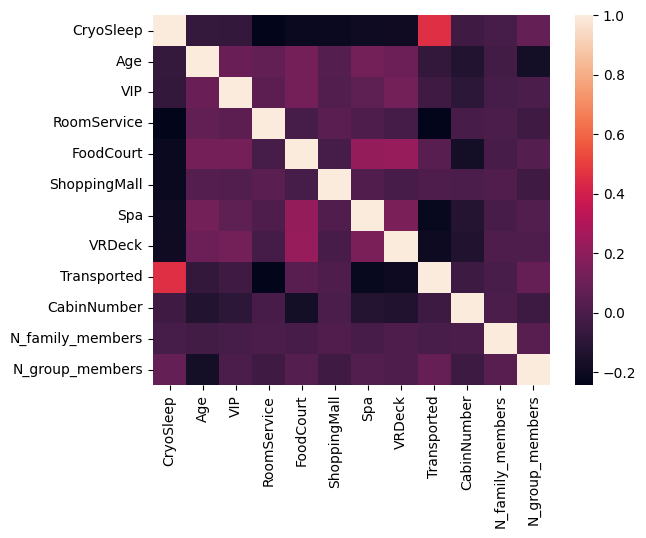

In [18]:
plt.plot()
sns.heatmap(data=df.corr())

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = sc.fit_transform(df[numeric_columns])
df_test[numeric_columns] = sc.transform(df_test[numeric_columns])

In [20]:
X_std = df.drop(columns=["Transported"])
y = df["Transported"]
X_test_std = df_test

In [21]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.0 MB/s eta 0:00:00


In [110]:
from sklearn.model_selection import train_test_split
X_train_std, X_val_std, y_train, y_val = train_test_split(X_std, y, shuffle=True, test_size=0.2, random_state=42, stratify=y)

In [140]:
from catboost import CatBoostClassifier

cat_features = df.select_dtypes(include=['object']).columns.tolist()
model = CatBoostClassifier(iterations=465,
                           learning_rate=0.1,
                           depth=4,
                           l2_leaf_reg = 3,
                           #bagging_temperature = 1,
                           #sampling_frequency = "PerTree",
                           #random_strength = 2,
                           use_best_model = True,
                           #grow_policy = "Lossguide",
                           #max_leaves = 50,
                           boosting_type = "Ordered",
                           eval_metric='Accuracy',
                           loss_function='Logloss',
                           cat_features=cat_features,
                           verbose=25)
# model = CatBoostClassifier(iterations=200,
#                            random_strength=0.05,
#                            one_hot_max_size=10,
#                            max_bin=100,
#                            learning_rate=0.1,
#                            l2_leaf_reg=0.5,
#                            grow_policy="Lossguide",
#                            depth=5,
#                            bootstrap_type="Bernoulli",
#                            loss_function='Logloss',
#                            eval_metric='Accuracy',
#                            cat_features=cat_features,
#                            verbose=25)

model.fit(X_train_std, y_train,
          eval_set=(X_val_std, y_val))

0:	learn: 0.7315214	test: 0.7239793	best: 0.7239793 (0)	total: 46.1ms	remaining: 21.4s
25:	learn: 0.8004026	test: 0.7901093	best: 0.7901093 (13)	total: 1.2s	remaining: 20.2s
50:	learn: 0.8091746	test: 0.7935595	best: 0.7970098 (47)	total: 2.51s	remaining: 20.4s
75:	learn: 0.8124820	test: 0.7981599	best: 0.7987349 (71)	total: 3.66s	remaining: 18.8s
100:	learn: 0.8180903	test: 0.7964347	best: 0.8004600 (93)	total: 4.67s	remaining: 16.8s
125:	learn: 0.8216854	test: 0.7993099	best: 0.8004600 (93)	total: 5.44s	remaining: 14.6s
150:	learn: 0.8236986	test: 0.8004600	best: 0.8016101 (135)	total: 5.99s	remaining: 12.4s
175:	learn: 0.8255680	test: 0.8021852	best: 0.8021852 (154)	total: 6.52s	remaining: 10.7s
200:	learn: 0.8291631	test: 0.8021852	best: 0.8033353 (187)	total: 7.07s	remaining: 9.28s
225:	learn: 0.8298821	test: 0.8050604	best: 0.8056354 (214)	total: 7.57s	remaining: 8s
250:	learn: 0.8311763	test: 0.8096607	best: 0.8096607 (235)	total: 8.11s	remaining: 6.92s
275:	learn: 0.8337647	tes

In [141]:
learn_error = pd.read_csv("/content/catboost_info/learn_error.tsv")
learn_error[['iter','Accuracy', 'Logloss']] = learn_error['iter	Accuracy	Logloss'].str.split('	', expand=True)
learn_error[['iter','Accuracy', 'Logloss']] = learn_error[['iter','Accuracy', 'Logloss']].astype(float, errors='ignore').round(3)
learn_error

,iter\tAccuracy\tLogloss,iter,Accuracy,Logloss
0,0\t0.7315214265\t0.6507234299,0.0,0.732,0.651
1,1\t0.7315214265\t0.6184567049,1.0,0.732,0.618
2,2\t0.7532355479\t0.5970056272,2.0,0.753,0.597
3,3\t0.7484900777\t0.5820466002,3.0,0.748,0.582
4,4\t0.7479148691\t0.5623547636,4.0,0.748,0.562
...,...,...,...,...
460,460\t0.84526891\t0.3421892135,460.0,0.845,0.342
461,461\t0.8454127121\t0.3421481792,461.0,0.845,0.342
462,462\t0.8454127121\t0.3420943706,462.0,0.845,0.342
463,463\t0.8454127121\t0.3420655771,463.0,0.845,0.342


In [142]:
test_error = pd.read_csv("/content/catboost_info/test_error.tsv")
test_error[['iter','Accuracy', 'Logloss']] = test_error['iter	Accuracy	Logloss'].str.split('	', expand=True)
test_error[['iter','Accuracy', 'Logloss']] = test_error[['iter','Accuracy', 'Logloss']].astype(float, errors='ignore').round(3)
test_error

,iter\tAccuracy\tLogloss,iter,Accuracy,Logloss
0,0\t0.7239792984\t0.6488490327,0.0,0.724,0.649
1,1\t0.7239792984\t0.6166865951,1.0,0.724,0.617
2,2\t0.7377803335\t0.597068743,2.0,0.738,0.597
3,3\t0.7360552041\t0.5823279439,3.0,0.736,0.582
4,4\t0.7349051179\t0.5620840662,4.0,0.735,0.562
...,...,...,...,...
460,460\t0.8142610696\t0.3732653328,460.0,0.814,0.373
461,461\t0.8142610696\t0.3732978413,461.0,0.814,0.373
462,462\t0.8136860265\t0.3733310517,462.0,0.814,0.373
463,463\t0.8148361127\t0.3732681529,463.0,0.815,0.373


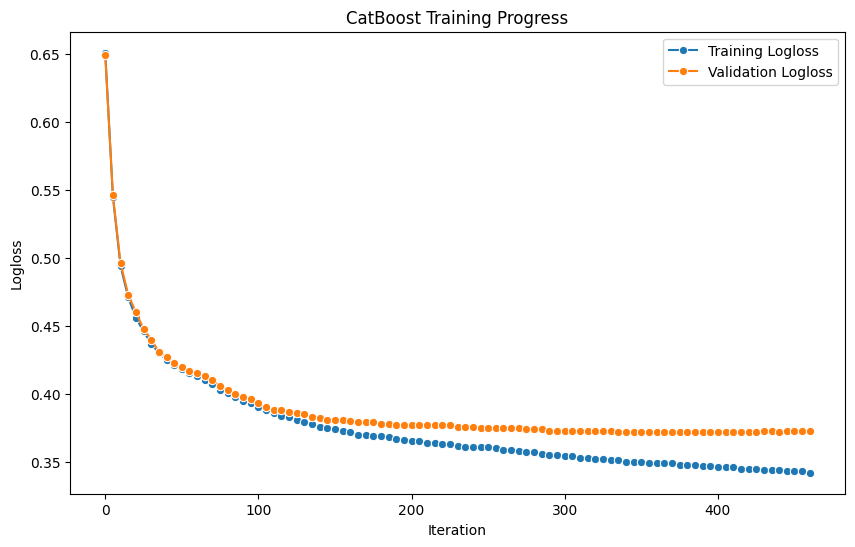

In [143]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=learn_error["iter"][::5], y=learn_error["Logloss"][::5], marker='o', label='Training Logloss')
sns.lineplot(x=test_error["iter"][::5], y=test_error["Logloss"][::5], marker='o', label='Validation Logloss')
plt.title('CatBoost Training Progress')
plt.xlabel('Iteration')
plt.ylabel('Logloss')
plt.legend()
plt.show()

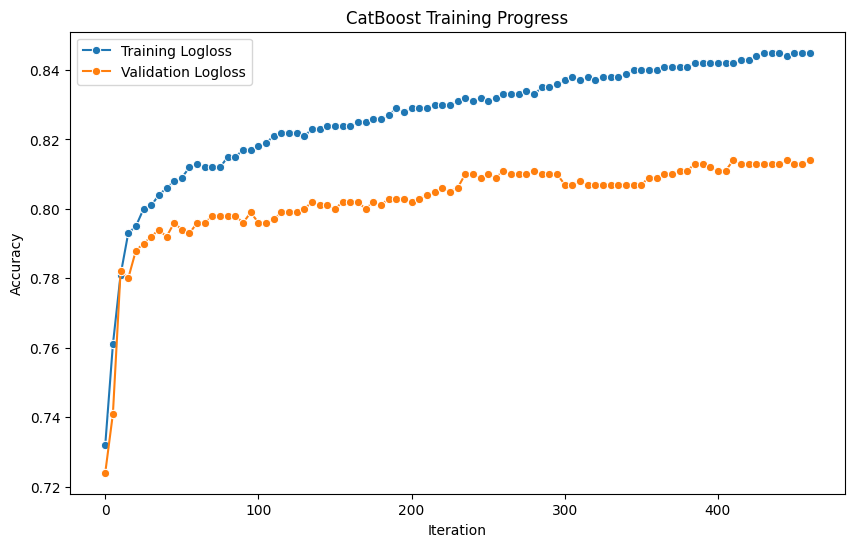

In [144]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=learn_error["iter"][::5], y=learn_error["Accuracy"][::5], marker='o', label='Training Logloss')
sns.lineplot(x=test_error["iter"][::5], y=test_error["Accuracy"][::5], marker='o', label='Validation Logloss')
plt.title('CatBoost Training Progress')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [145]:
submission = pd.read_csv('sample_submission.csv')
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [146]:
y_pred_gb = model.predict(X_test_std)

In [147]:
submission["Transported"] = y_pred_gb
submission.to_csv('submission_gb.csv', index=None)